In [2]:
from ddnn.nn import *
from ddnn.validation import *
from ddnn.data import *

estimator = Estimator(
    net=NeuralNetwork(
        [
            LinearLayer((9, 32)),
            ActivationFunction("tanh"),
            LinearLayer((32, 32)),
            ActivationFunction("tanh"),
            LinearLayer((32, 2)),
        ]
    ),
    loss=LossFunction("MSE"),
    # optimizer=Optimizer("SGD", learning_rate=0.5, momentum_coefficient=0.5, l2_coefficient=0),
    optimizer=Optimizer("Adam", learning_rate=0.01, l2_coefficient=0.0033),
    batchsize=-1,
    initializer=Initializer("glorot_uniform"),
    seed=123,
)
early_stopping = 2.557191205025858
epochs = 1500
log_every = 1
losses = ["MSE", "MEE"]

In [3]:
traindata = read_ML_cup("train")
blindtest = read_ML_cup("test")

In [4]:
traindata.shape, blindtest.shape

((1492, (9, 2)), (529, (9, 0)))

In [5]:
teststopper = TrainingThresholdStopping(estimator, early_stopping)

In [6]:
estimator.train(traindata, callback=teststopper, n_epochs=epochs)

In [7]:
res = estimator.predict(blindtest)

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

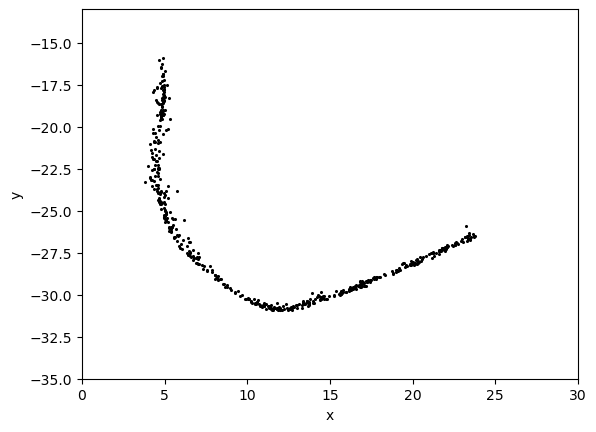

In [9]:
fig, ax = plt.subplots()

pred = estimator.predict(blindtest)

ax.set_xlim(0, 30)
ax.set_ylim(-35, -13)
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(pred[:, 0], pred[:, 1], color="black", s=6, marker=".");

In [26]:
blind_output = pd.DataFrame(pred)
blind_output.index += 1
blind_output.head()

,0,1
1,21.986943,-27.184046
2,6.720713,-27.669371
3,12.650306,-30.729785
4,19.895476,-28.208815
5,4.113491,-23.028284


In [27]:
blind_output.to_csv("blind_output.csv", header=None)